# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [80]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [81]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 598


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [82]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city.replace(" ","+") 
    #f"{url}appid={weather_api_key}&q={city}.replace(" ","+")"
    #f"{url}appid={api_key}&units={units}&q="
    
    
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | anadyr
Processing Record 2 of Set 1 | lebu
Processing Record 3 of Set 1 | blackmans bay
Processing Record 4 of Set 1 | cargados carajos
City not found. Skipping...
Processing Record 5 of Set 1 | vanadzor
Processing Record 6 of Set 1 | i-n-salah
Processing Record 7 of Set 1 | saipan
Processing Record 8 of Set 1 | adamstown
Processing Record 9 of Set 1 | trairi
Processing Record 10 of Set 1 | st. john's
Processing Record 11 of Set 1 | vorgashor
Processing Record 12 of Set 1 | keflavik
Processing Record 13 of Set 1 | tauranga
Processing Record 14 of Set 1 | sitka
Processing Record 15 of Set 1 | udachny
Processing Record 16 of Set 1 | vadso
Processing Record 17 of Set 1 | port-aux-francais
Processing Record 18 of Set 1 | bethel
Processing Record 19 of Set 1 | lazaro cardenas
Processing Record 20 of Set 1 | cable beach
City not found. Skipping...
Processing Record 21 of Set 1 | waitangi
Processing Rec

In [83]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          562
Lat           562
Lng           562
Max Temp      562
Humidity      562
Cloudiness    562
Wind Speed    562
Country       562
Date          562
dtype: int64

In [84]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,anadyr,64.7500,177.4833,287.43,62,40,3.00,RU,1691645320
1,lebu,-37.6167,-73.6500,284.40,88,63,5.06,CL,1691645321
2,blackmans bay,-43.0167,147.3167,287.33,58,63,4.86,AU,1691645321
3,vanadzor,40.8046,44.4939,297.39,66,0,1.28,AM,1691645321
4,i-n-salah,27.1935,2.4607,304.31,16,0,4.63,DZ,1691645321


In [85]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [86]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,anadyr,64.7500,177.4833,287.43,62,40,3.00,RU,1691645320
1,lebu,-37.6167,-73.6500,284.40,88,63,5.06,CL,1691645321
2,blackmans bay,-43.0167,147.3167,287.33,58,63,4.86,AU,1691645321
3,vanadzor,40.8046,44.4939,297.39,66,0,1.28,AM,1691645321
4,i-n-salah,27.1935,2.4607,304.31,16,0,4.63,DZ,1691645321


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

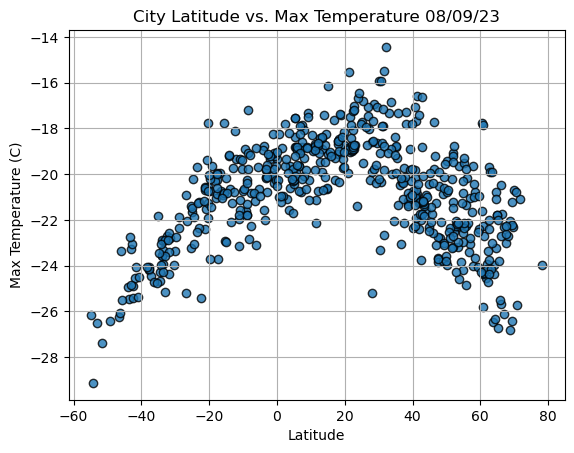

In [89]:
# Convert F to C
city_data_df["Max Temp"] = (city_data_df["Max Temp"]-32) *5/9 
#- 273.15

# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

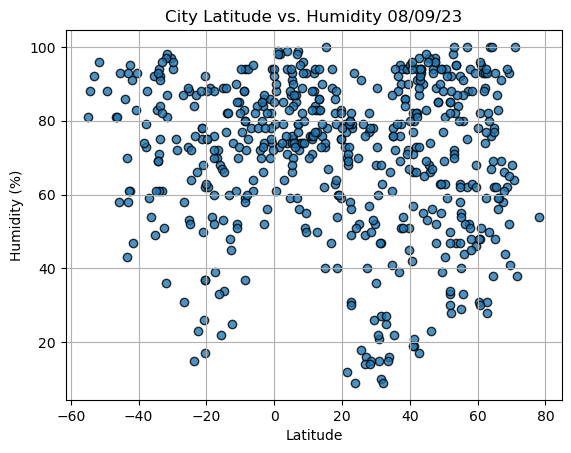

In [90]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity "+ time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

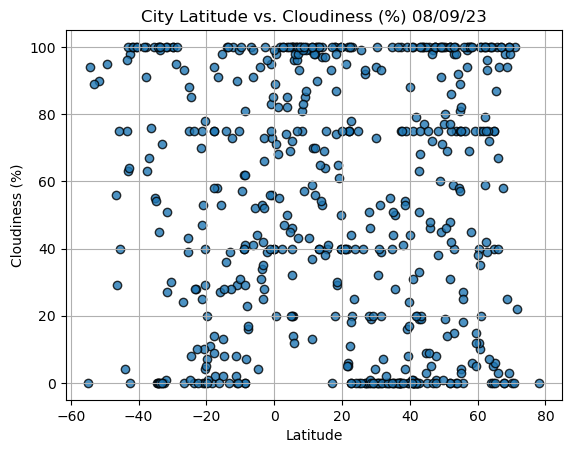

In [91]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

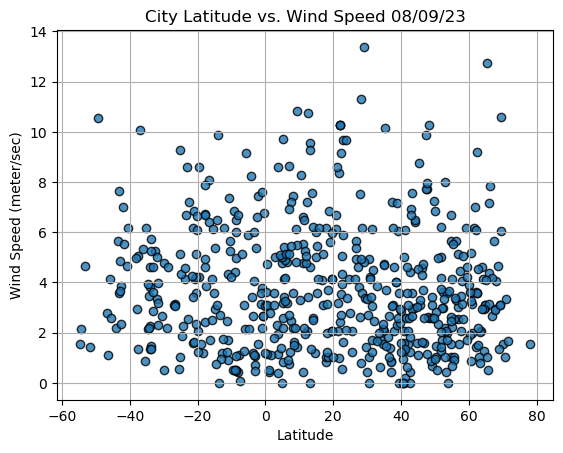

In [92]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (meter/sec)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [97]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-value is: {r_value**2}")
    plt.show()

In [98]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,anadyr,64.7500,177.4833,-23.246914,62,40,3.00,RU,1691645320
3,vanadzor,40.8046,44.4939,-20.172840,66,0,1.28,AM,1691645321
4,i-n-salah,27.1935,2.4607,-18.037037,16,0,4.63,DZ,1691645321
5,saipan,15.1355,145.7010,-19.141975,100,75,3.58,MP,1691645322
8,st. john's,47.5649,-52.7093,-23.685185,97,100,7.72,CA,1691645183


In [99]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,lebu,-37.6167,-73.6500,-24.182099,88,63,5.06,CL,1691645321
2,blackmans bay,-43.0167,147.3167,-23.277778,58,63,4.86,AU,1691645321
6,adamstown,-25.0660,-130.1015,-21.635802,53,88,9.26,PN,1691645322
7,trairi,-3.2778,-39.2689,-20.129630,84,25,4.06,BR,1691645125
11,tauranga,-37.6861,176.1667,-24.061728,79,91,1.34,NZ,1691645031


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.36563659041311564


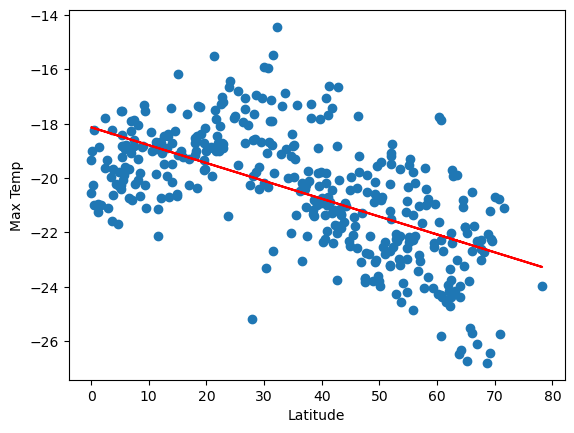

In [100]:
# Linear regression on Northern Hemisphere
# Define the x-values and y-values for the scatter plot and linear regression

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function to create plot
plot_linear_regression(x_values, y_values, 'Max Temp', (10,40))




The r-value is: 0.6669518008036606


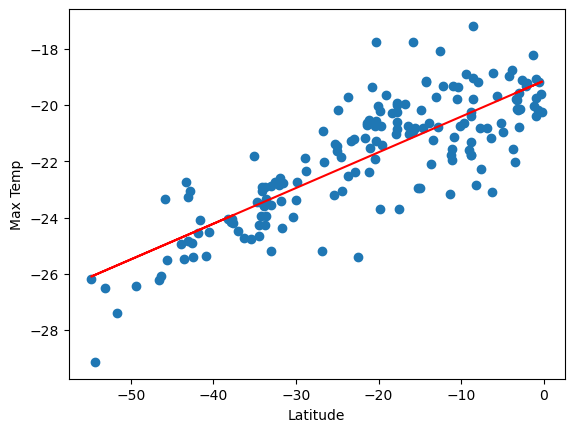

In [101]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function to create plot
plot_linear_regression(x_values, y_values, 'Max Temp', (10,40))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.01350077361878225


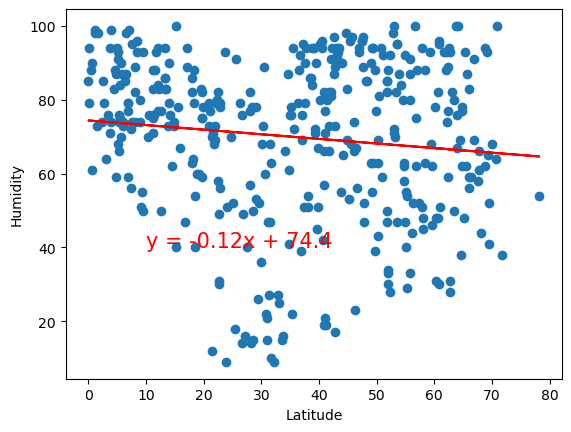

In [108]:
# Northern Hemisphere
# YOUR CODE HERE

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df['Humidity']

# Call the function to create plot
plot_linear_regression(x_values, y_values, 'Humidity', (10,40))


The r-value is: 0.006132123208878653


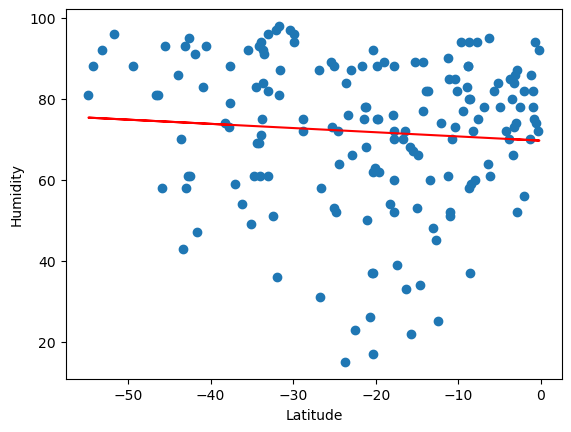

In [109]:
# Southern Hemisphere
# YOUR CODE HERE

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df['Humidity']

# Call the function to create plot
plot_linear_regression(x_values, y_values, 'Humidity', (10,40))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.01745906098328134


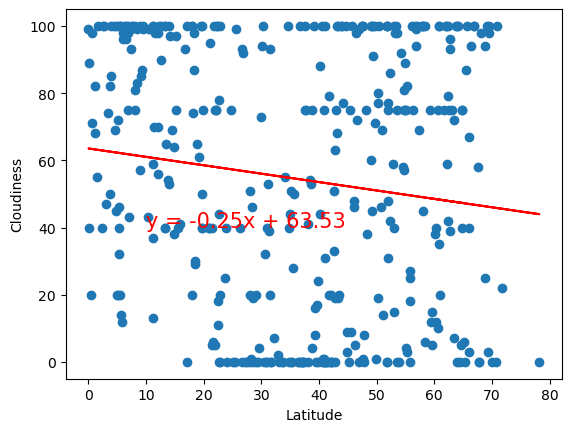

In [110]:
# Northern Hemisphere
# YOUR CODE HERE

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df['Cloudiness']

# Call the function to create plot
plot_linear_regression(x_values, y_values, 'Cloudiness', (10,40))

The r-value is: 0.006132123208878653


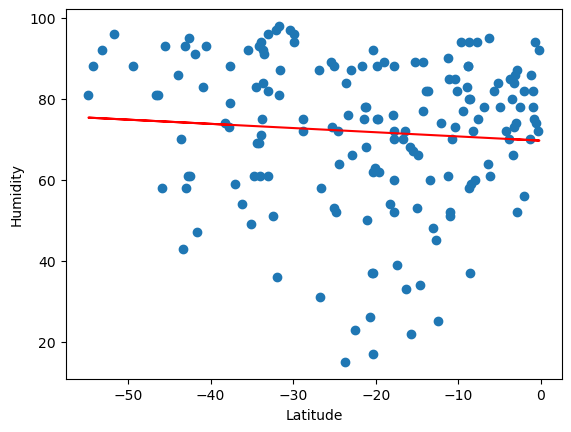

In [111]:
# Southern Hemisphere
# YOUR CODE HERE

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df['Humidity']

# Call the function to create plot
plot_linear_regression(x_values, y_values, 'Humidity', (10,40))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0026400201674574354


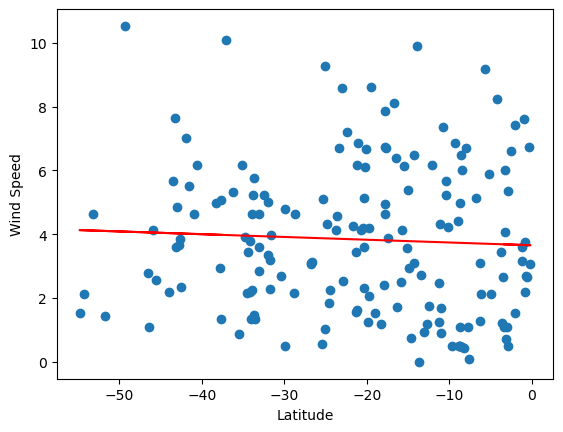

In [112]:
# Northern Hemisphere
# YOUR CODE HERE

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df['Wind Speed']

# Call the function to create plot
plot_linear_regression(x_values, y_values, 'Wind Speed', (10,40))

The r-value is: 0.0026400201674574354


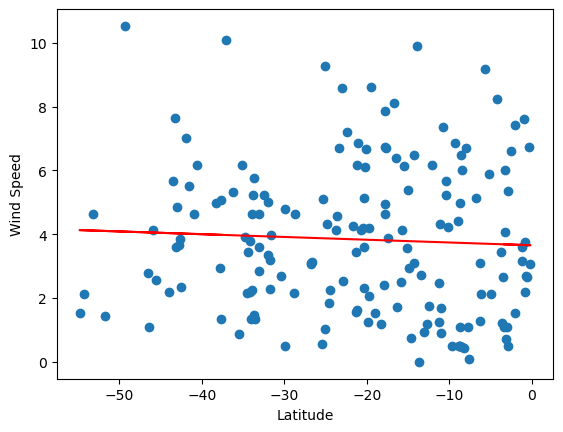

In [113]:
# Southern Hemisphere
# YOUR CODE HERE

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df['Wind Speed']

# Call the function to create plot
plot_linear_regression(x_values, y_values, 'Wind Speed', (10,40))

**Discussion about the linear relationship:** YOUR RESPONSE HERE